# mall customer segmentation

In [2]:
#imports
 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

In [3]:
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [5]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
#getting the data

df= pd.read_csv('Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
# standardizing data

col_names = ['Annual Income (k$)', 'Age', 'Spending Score (1-100)']
features = df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features,columns = col_names)
scaled_features.head()

,Annual Income (k$),Age,Spending Score (1-100)
0,-1.738999,-1.424569,-0.434801
1,-1.738999,-1.281035,1.195704
2,-1.700830,-1.352802,-1.715913
3,-1.700830,-1.137502,1.040418
4,-1.662660,-0.563369,-0.395980


In [10]:
# making gender categorical using one hot encoding

gender = df['Gender']
newdf=scaled_features.join(gender)

newdf = pd.get_dummies(newdf, prefix=None, prefix_sep='_',dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

newdf = newdf.drop(['Gender_Male'],axis=1)

newdf.head()

,Annual Income (k$),Age,Spending Score (1-100),Gender_Female
0,-1.738999,-1.424569,-0.434801,False
1,-1.738999,-1.281035,1.195704,False
2,-1.700830,-1.352802,-1.715913,True
3,-1.700830,-1.137502,1.040418,True
4,-1.662660,-0.563369,-0.395980,True


C:\Users\Sara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

Text(0, 0.5, 'Inertia')

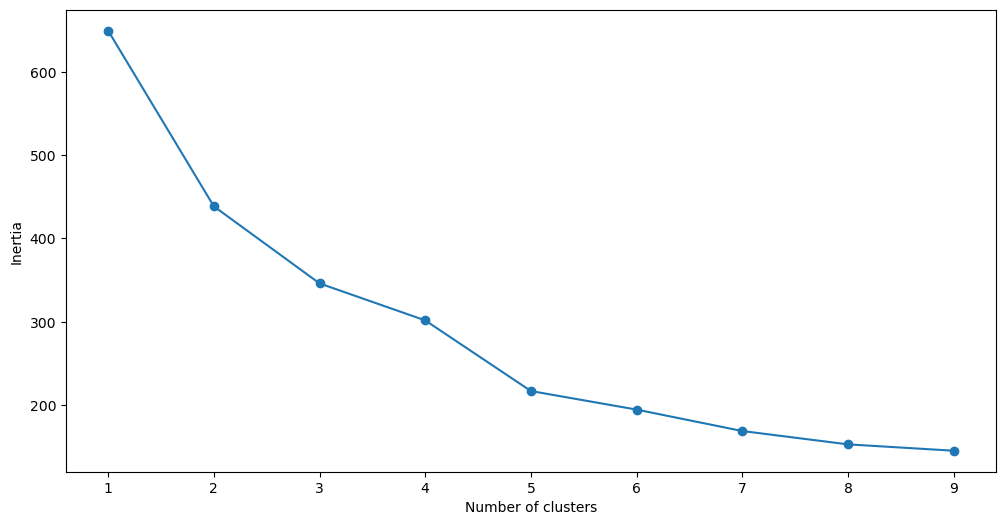

In [13]:
#building cluster

SSE= []
for cluster in range(1,10):
    kmeans = KMeans(n_init='auto', n_clusters = cluster, init='k-means++')
    kmeans.fit(newdf)
    SSE.append(kmeans.inertia_)

frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [14]:
# the elbow graphs shows 5 clusters to be optimal.
# to be verified with silhouette score

In [15]:
#building model with 5 clusters

kmeans = KMeans(n_init='auto', n_clusters = 5, init='k-means++')
kmeans.fit(newdf)

C:\Users\Sara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [17]:
#printing silhouette score of this model

silhouette_score(newdf, kmeans.labels_, metric='euclidean')

0.3555395866167352

C:\Users\Sara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


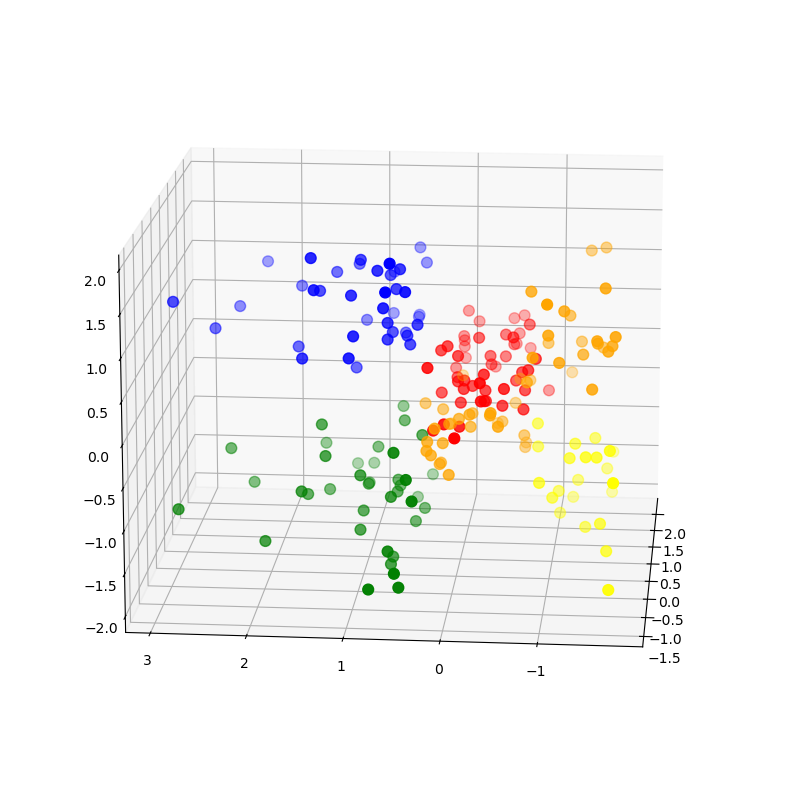

In [20]:
# visualizing clusters

clusters =kmeans.fit_predict(df.iloc[:,2:])
newdf['label'] = clusters

fig = plt.figure(figsize=(21,10))
ax =fig.add_subplot(111, projection='3d')

ax.scatter(newdf.Age[newdf.label == 0], newdf["Annual Income (k$)"][newdf.label == 0], newdf["Spending Score (1-100)"][newdf.label == 0], c='blue', s=60)
ax.scatter(newdf.Age[newdf.label == 1], newdf["Annual Income (k$)"][newdf.label == 1], newdf["Spending Score (1-100)"][newdf.label == 1], c='red', s=60)
ax.scatter(newdf.Age[newdf.label == 2], newdf["Annual Income (k$)"][newdf.label == 2], newdf["Spending Score (1-100)"][newdf.label == 2], c='green', s=60)
ax.scatter(newdf.Age[newdf.label == 3], newdf["Annual Income (k$)"][newdf.label == 3], newdf["Spending Score (1-100)"][newdf.label == 3], c='orange', s=60)
ax.scatter(newdf.Age[newdf.label == 4], newdf["Annual Income (k$)"][newdf.label == 4], newdf["Spending Score (1-100)"][newdf.label == 4], c='yellow', s=60)

ax.view_init(15,185)
plt.show()

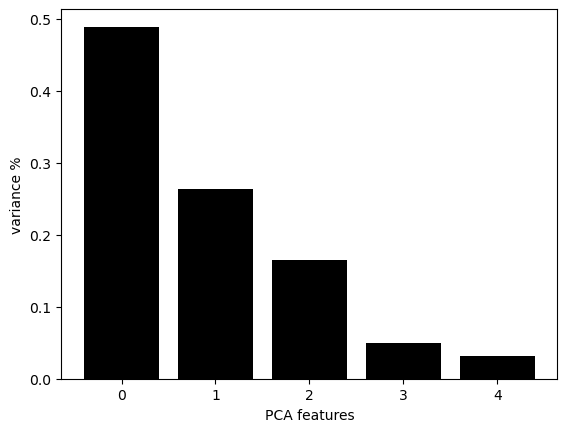

In [21]:
#imporving separation using PCA to recude dimensionality/features

pca= PCA(n_components=5)
principalComponents = pca.fit_transform(newdf)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_,color ='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components= pd.DataFrame(principalComponents)

In [22]:
#using first 3 components to check

C:\Users\Sara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

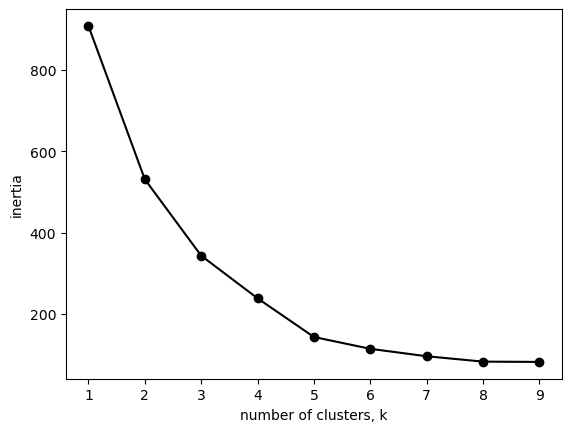

In [23]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_init='auto', n_clusters=k)
    model.fit(PCA_components.iloc[:,:3])
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [24]:
#4 clusters and first 3 features

In [25]:
model = KMeans(n_init='auto', n_clusters=4)
model.fit(PCA_components.iloc[:,:2])

# silhouette score
print(silhouette_score(PCA_components.iloc[:,:2], model.labels_, metric='euclidean'))

0.6676713099393515


C:\Users\Sara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\Sara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


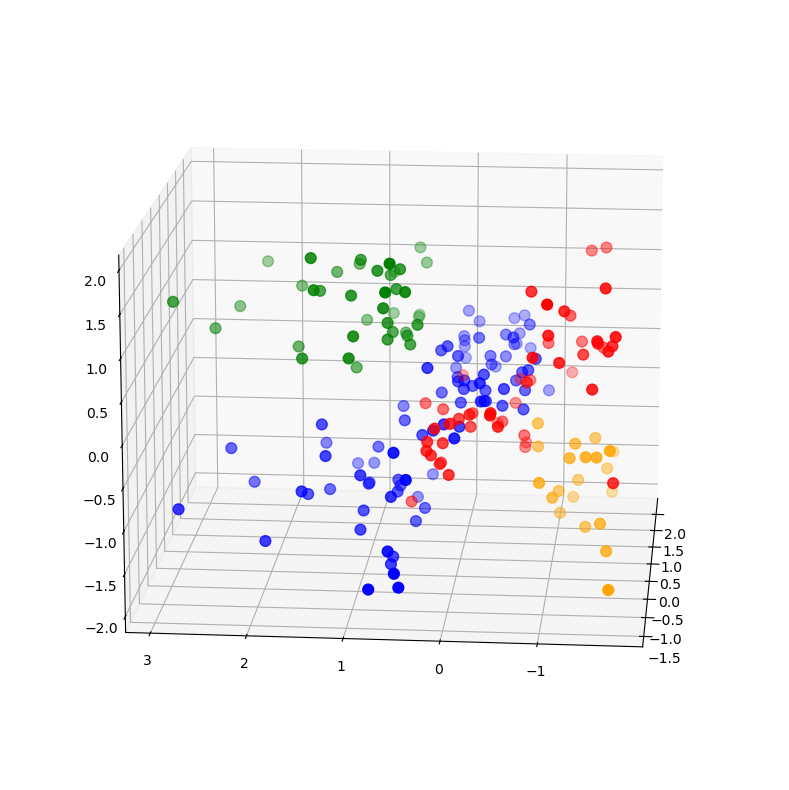

In [26]:
# visualizing the clusters
model = KMeans(n_init='auto', n_clusters=4)

clusters = model.fit_predict(PCA_components.iloc[:,:2])
newdf["label"] = clusters

fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(newdf.Age[newdf.label == 0], newdf["Annual Income (k$)"][newdf.label == 0], newdf["Spending Score (1-100)"][newdf.label == 0], c='blue', s=60)
ax.scatter(newdf.Age[newdf.label == 1], newdf["Annual Income (k$)"][newdf.label == 1], newdf["Spending Score (1-100)"][newdf.label == 1], c='red', s=60)
ax.scatter(newdf.Age[newdf.label == 2], newdf["Annual Income (k$)"][newdf.label == 2], newdf["Spending Score (1-100)"][newdf.label == 2], c='green', s=60)
ax.scatter(newdf.Age[newdf.label == 3], newdf["Annual Income (k$)"][newdf.label == 3], newdf["Spending Score (1-100)"][newdf.label == 3], c='orange', s=60)

ax.view_init(15, 185)
plt.show()

In [28]:
df = pd.read_csv('Mall_Customers.csv')
df = df.drop(['CustomerID'],axis=1)

# map back clusters to dataframe

pred = model.predict(PCA_components.iloc[:,:2])
frame = pd.DataFrame(df)
frame['cluster'] = pred
frame.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,3
3,Female,23,16,77,1
4,Female,31,17,40,3


In [29]:
# comparing avg of all variables across each cluster
avg_df = frame.groupby(['cluster'], as_index=False).mean(numeric_only=True)
avg_df

,cluster,Age,Annual Income (k$),Spending Score (1-100)
0,0,48.375000,68.488636,36.102273
1,1,24.653846,41.500000,62.557692
2,2,32.692308,86.538462,82.128205
3,3,45.523810,26.285714,19.380952


<Axes: xlabel='cluster', ylabel='Age'>

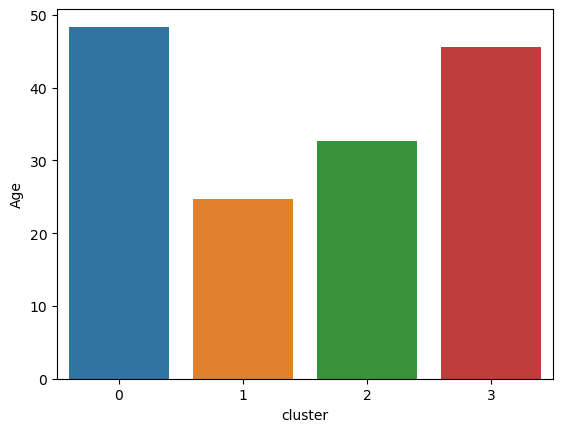

In [30]:
#looking at each of these features separately
sns.barplot(x='cluster',y='Age',data=avg_df)

<Axes: xlabel='cluster', ylabel='Spending Score (1-100)'>

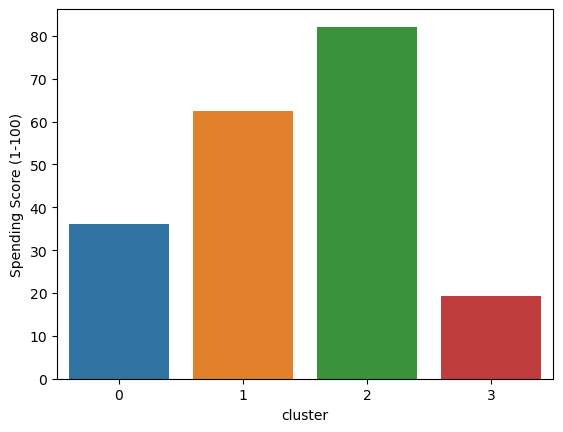

In [31]:
sns.barplot(x='cluster',y='Spending Score (1-100)',data=avg_df)

<Axes: xlabel='cluster', ylabel='Annual Income (k$)'>

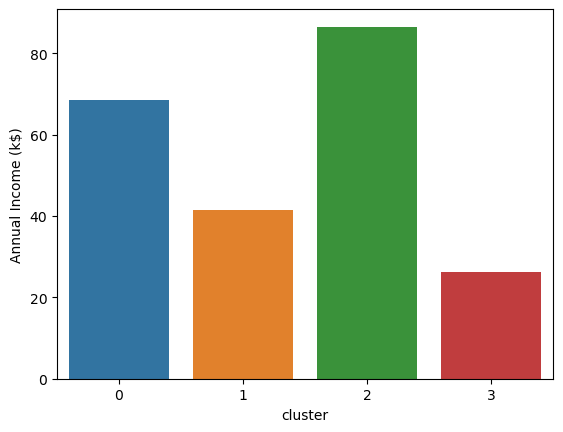

In [32]:
sns.barplot(x='cluster',y='Annual Income (k$)',data=avg_df)

In [33]:
#getting avg age, avg income, avg spending in each cluster

avg_df = frame.groupby(['cluster'], as_index=False).mean(numeric_only=True).round(1)
avg_df

,cluster,Age,Annual Income (k$),Spending Score (1-100)
0,0,48.4,68.5,36.1
1,1,24.7,41.5,62.6
2,2,32.7,86.5,82.1
3,3,45.5,26.3,19.4


In [34]:
# Conclusion

# Cluster 0: Older, high income, mid spenders
# Cluster 1: Young, mid income, high spenders
# Cluster 2: mid-life, high income, high spenders
# Cluster 3: older, low income, low spenders